# **Sesion 1 NLP Practice**

This notebook provides a practical introduction to Natural Language Processing (NLP) concepts using SpaCy. It demonstrates how to load and process text, perform tokenization, sentence segmentation, and extract linguistic attributes such as POS tags, dependency tags, and lemmas. Additionally, it covers pattern matching with spaCy's Matcher to identify specific phrases within the text. The exercises in this notebook are applied to the classic tale "The Three Little Pigs," obtained from [Proyecto Gutenberg](https://www.gutenberg.org/cache/epub/18155/pg18155.txt), Comments, spaCy version, and the story used will be in English.

***Note:** Comments, spaCy version, and the story used will be in English.*

In [ ]:
import pkg_resources
import warnings

warnings.filterwarnings('ignore')

installed_packages = [package.key for package in pkg_resources.working_set]
IN_COLAB = 'google-colab' in installed_packages

/tmp/ipython-input-2396000874.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [ ]:
!test '{IN_COLAB}' = 'True' && wget  https://github.com/Carlos-SD/NLP/raw/refs/heads/main/requirements.txt && pip install -r requirements.txt

--2026-02-16 02:12:37--  https://github.com/Carlos-SD/NLP/raw/refs/heads/main/requirements.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Carlos-SD/NLP/refs/heads/main/requirements.txt [following]
--2026-02-16 02:12:37--  https://raw.githubusercontent.com/Carlos-SD/NLP/refs/heads/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482 [text/plain]
Saving to: ‘requirements.txt.3’

requirements.txt.3  100%[===================>]     482  --.-KB/s    in 0s      

2026-02-16 02:12:37 (26.9 MB/s) - ‘requirements.txt.3’ saved [482/482]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# spacy import for english language:
import spacy
nlp = spacy.load('en_core_web_sm')

### **1.   The text to use will be get from the remote repository**

> "Three Little Pigs".           
> L. Leslie Brooke



In [2]:
!test '{IN_COLAB}' = 'True' && wget  https://github.com/Carlos-SD/NLP/raw/refs/heads/main/1-Sesion-activity/three_little_pigs.txt

In [3]:
with open('./three_little_pigs.txt') as file:
    doc = nlp(file.read()) # This saves the .txt as a variable file for it to be used to read it and be printed after

doc[:119] #As the example for the practice uses it, we take 199 tokens from the book, to catch at least the title at the .txt

The Project Gutenberg eBook of The Story of the Three Little Pigs
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: The Story of the Three Little Pigs


### **2.   List lenght of tokens at the file**

In [4]:
len(doc)

5340

### **3.   How many sentences are there in the file?**

In [5]:
sentences = list(doc.sents)
len(sentences)

170

### **4.   Print the second sentence from the file**          
**Note:** This .txt has its title at the third sentence as the first two are terms from Gutenberg

In [6]:
#sentences[0]
sentences[3]

Title: The Story of the Three Little Pigs


### **5. For each token, print its `text`, `POS` tag, `dep` tag y `lemma`**
<br>

In [7]:
print("{:20}{:20}{:20}{:20}".format("Text", "POS", "dep", "lemma"))
for token in sentences[1]:
    print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")

Text                POS                 dep                 lemma               
You                 PRON                nsubj               you                 
may                 AUX                 aux                 may                 
copy                VERB                ROOT                copy                
it                  PRON                dobj                it                  
,                   PUNCT               punct               ,                   
give                VERB                dep                 give                
it                  PRON                dobj                it                  
away                ADV                 advmod              away                
or                  CCONJ               cc                  or                  
re                  VERB                conj                re                  
-                   VERB                conj                -                   
use                 VERB    

### **5.1 Named Entity Recognition (NER)**

For each sentence, the idea is to display  the original text, detailed token information (POS, dependency, and lemma), identifying any named entities (NER), including their labels and a brief explanation.

In [8]:
print("{:20}{:20}{:20}".format("Text", "Label", "Explanation"))
for i in range(10, 16): # Iterate from sentence 10 to 15 (inclusive)
    current_sentence = sentences[i]
    print(f'Original sentence ({i}):', current_sentence.text, '\n')
    print("{:20}{:20}{:20}{:20}".format("Token Text", "POS", "dep", "lemma"))
    for token in current_sentence:
        print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")
    print('\n') # Separator between token details and entity details
    if current_sentence.ents:
        print("Named Entities:")
        for ent in current_sentence.ents:
            print(f"{ent.text:{20}}{ent.label_:{20}}{spacy.explain(ent.label_):{20}}")
    else:
        print("No named entities found in this sentence.")
    print("-" * 60) # Separator for readability between sentences

Text                Label               Explanation         
Original sentence (10): Once upon a time there was an old Sow with three little Pigs,
and as she had not enough to keep them, she sent them out to seek their
fortune.

 

Token Text          POS                 dep                 lemma               
Once                ADV                 advmod              once                
upon                SCONJ               prep                upon                
a                   DET                 det                 a                   
time                NOUN                pobj                time                
there               PRON                expl                there               
was                 VERB                ROOT                be                  
an                  DET                 det                 an                  
old                 ADJ                 amod                old                 
Sow                 PROPN              

For each of the selected sentences, the code prints the raw text, then every token with its POS tag, dependency label, and lemma, and finally any named entities (NER) detected by spaCy with their label and a short explanation.

The generic NER model does not always get the meaning right in this story—e.g. "chin chin" or "Pigs" may be misclassified (e.g. as an organization instead of characters). That shows how general-purpose models can struggle with fictional or domain-specific text.

### **6. Implement a matcher that finds the ocurrences of phrases *"little pig"***

In [57]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

patterns = {
    "LittlePig": [{'LOWER': 'little'}, {'IS_SPACE': True, 'OP': '*'}, {'LOWER': 'pig'}],
    "WolfBlow": [
        {'LOWER': 'blow'}, {'IS_SPACE': True, 'OP': '*'},
        {'LOWER': 'your'}, {'IS_SPACE': True, 'OP': '*'},
        {'LOWER': 'house'}, {'IS_SPACE': True, 'OP': '*'}
    ]
}

for pattern_name, pattern_value in patterns.items():
    matcher.add(pattern_name, [pattern_value])

found_matches = matcher(doc)

The code defines a spaCy `Matcher` with two patterns—"little pig" (with optional spaces) and "blow your house"—adds them to the matcher, and runs it on the full document. The result `found_matches` holds every match (pattern name, start index, end index) for use in the next cells.

### **7. Print the text around each found match**

In [56]:
print("Found matches:")
for match_id, start, end in found_matches:
    span = doc[start:end]  # Get the matched span
    pattern_name = nlp.vocab.strings[match_id]
    print(f"{pattern_name} -> {span.text}")

Found matches:
LittlePig -> little Pig
LittlePig -> Little Pig
LittlePig -> little Pig
WolfBlow -> blow your house
WolfBlow -> blow your house

LittlePig -> little Pig
LittlePig -> Little Pig
LittlePig -> little Pig
WolfBlow -> blow your house
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> Little Pig
LittlePig -> little Pig
WolfBlow -> blow your house
LittlePig -> Little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> Little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> Little Pig
LittlePig -> little Pig
LittlePig -> Little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> Little
Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> little Pig
LittlePig -> little Pig


It loops over `found_matches` and prints the exact span of text for each match (e.g. "little Pig", "blow your house") and which pattern matched it. So we see how often "little pig" and "blow your house" appear in the story—"little pig" turns out to be very frequent, as the wolf keeps calling the pigs.

### **8. Print the sentence that contains each found match**

In [52]:
for sentence in sentences:
    for _, start, end in found_matches:
        if sentence.start <= start and sentence.end >= end:
            print(f'Sentence: {sentence.text}\n')
            print("{:20}{:20}{:20}{:20}".format("Text", "POS", "dep", "lemma"))
            for token in sentence:
                print(f"{token.text:{20}}{token.pos_:{20}}{token.dep_:{20}}{token.lemma_:{20}}")
            print("-" * 60) # Separator for readability between sentences
            print('\n') # Add an extra newline for better separation between sentences and their token details

Sentence: [Illustration]

[Illustration]

[Illustration]

The first that went off met a Man with a bundle of straw, and said to
him, "Please, Man, give me that straw to build me a house"; which the
Man did, and the little Pig built a house with it.

Text                POS                 dep                 lemma               
[                   X                   dep                 [                   
Illustration        NOUN                dep                 illustration        
]                   PUNCT               punct               ]                   


                  SPACE               dep                 

                  
[                   X                   dep                 [                   
Illustration        NOUN                dep                 illustration        
]                   PUNCT               punct               ]                   


                  SPACE               dep                 

                  
[                   X

For each match, the code finds the sentence that contains it (by comparing character spans) and prints that full sentence. So we see the context of every "little pig" and "blow your house" occurrence. From this we can see that "little pig" is how the characters refer to each pig in the story, not only when the wolf is calling them.

### **9. Frequency Analysis of Words (Lemmas)**

In [53]:
from collections import Counter

# Get all lemmas, excluding punctuation, spaces, and stop words
almost_all_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

# Count the frequency of each lemma
lemma_counts = Counter(almost_all_lemmas)

# Display the 20 most common lemmas
print("20 Most Common Lemmas:")
for lemma, count in lemma_counts.most_common(20):
    print(f"{lemma}: {count}")

20 Most Common Lemmas:
project: 91
gutenberg: 91
work: 77
™: 57
little: 38
pig: 38
electronic: 27
illustration: 26
foundation: 25
copy: 24
term: 21
say: 20
copyright: 20
distribute: 19
license: 18
wolf: 18
agreement: 18
law: 17
come: 17
united: 15


The code takes every token in the document, converts it to its lemma (base form), and drops punctuation, spaces, and stop words. Then it counts how often each lemma appears and shows the 20 most common. This gives a quick view of which concepts or characters are central to the story (e.g. "pig", "little", "wolf").

### **10. Part-of-Speech (POS) Tag Distribution**

The code collects the part-of-speech (POS) tag of every token (ignoring punctuation and spaces), counts how often each POS appears, and plots those counts in a bar chart. This shows the grammatical profile of the text—e.g. how many nouns, verbs, or adjectives the story uses.

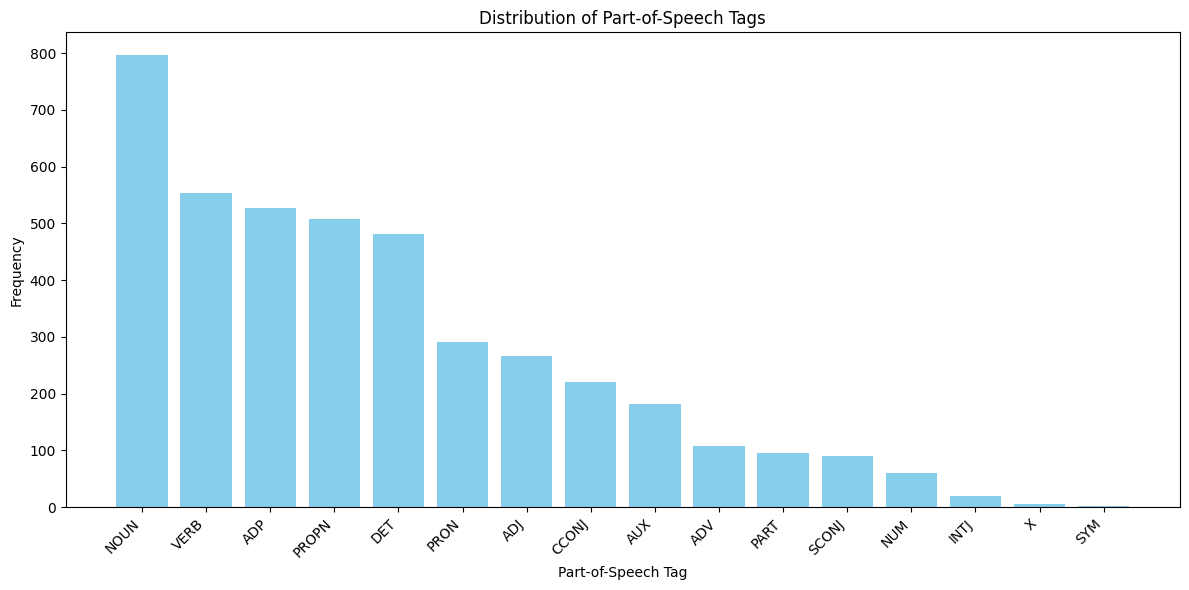

In [54]:
import matplotlib.pyplot as plt

# Get all POS tags
pos_tags = [token.pos_ for token in doc if not token.is_punct and not token.is_space]

# Count the frequency of each POS tag
pos_counts = Counter(pos_tags)
sorted_pos_counts = sorted(pos_counts.items(), key=lambda item: item[1], reverse=True)
labels = [item[0] for item in sorted_pos_counts]
counts = [item[1] for item in sorted_pos_counts]

# Plotting the POS tag distribution
plt.figure(figsize=(12, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Part-of-Speech Tag')
plt.ylabel('Frequency')
plt.title('Distribution of Part-of-Speech Tags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **11. Conclusions**

Working through The Three Little Pigs with spaCy turned out to be a good way to get a feel for basic NLP. We loaded the text, split it into tokens and sentences, and pulled out POS tags, dependencies, and lemmas—so instead of just seeing words we could see how the story is put together grammatically.

The lemma frequency list was handy to see what the story is really about: "pig" and "little" show up a lot, which makes sense, and "project" / "gutenberg" are there too because of the header. So without reading the whole thing you get a quick idea of what it revolves around.

The POS bar chart gave a similar kind of overview—lots of nouns and verbs, which fits a short narrative with characters and actions. Nothing fancy, but it shows how you can look at style through grammar.

Where things got a bit funny was NER. The default model (en_core_web_sm) sometimes got it wrong: "Pigs" as an organization, "chin chin" as a person, etc. So for a made-up story the out-of-the-box model isn't always reliable—you'd need something tuned to your kind of text if you care about getting entities right.

The Matcher was the opposite: we knew we wanted "little pig" and "blow your house" and it found them without a problem. When you have a clear phrase in mind, rule-based matching like that is simple and does the job.

So in the end we mixed a bit of stats (frequency, POS), a bit of visualization, NER (with its limits), and the Matcher—and got a more concrete sense of what's in the text. Even with a simple story like this one, that combo is useful.